<center><h1>Movie Sentiment Reviews using Different Algorithms</h1></center>
<center><h2>A Classification Exercise</h2></center>

# Abstract
Using tagged movie reviews, I attempted to conduct feature engineering and sentiment prediction of future reviews. The techniques used are different types of vectorizers and ML models.

In [5]:
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from utils import string_utils

       id                                             review  sentiment
0  5196_9  Human Tornado (1976) is in many ways a better ...          1
1  2668_9  Chilling, majestic piece of cinematic fright, ...          1
2  9565_3  I cant say that Wargames The Dead Code is the ...          0

   sentiment     n
0          0  2477
1          1  2523


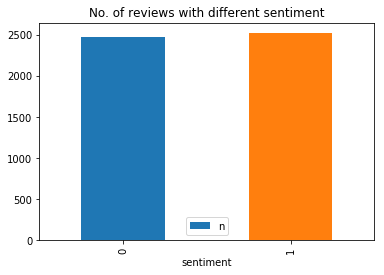

In [12]:
# Read from CSV file
popcorn_df = pd.read_csv('popcorn-reviews-5k.csv', sep="#") 
print(popcorn_df.head(3))
print()
sentiment_count = popcorn_df.groupby('sentiment').size().reset_index(name='n')
print(sentiment_count)
sentiment_count.plot(kind='bar', x='sentiment', y='n', title="No. of reviews with different sentiment")
plt.show()

The number of reviews in the positive class and negative class are about the same, so we son't face issues of imbalanced class problems.

## Baseline

In [3]:
# Feature Engineering 
X, y = popcorn_df['review'], popcorn_df['sentiment']
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [4]:
# Using fit_transform, transform the corpus to a matrix.
count_vect = CountVectorizer()
train_df_counts = count_vect.fit_transform(X_train)
# Train a multinomial classifier using the training set using the features and the training set labels
clf = MultinomialNB().fit(train_df_counts, y_train)

In [5]:
# Predict for test set
test_review_documents = count_vect.transform(X_test)
y_predict = clf.predict(test_review_documents)
cm = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

[[419  82]
 [116 383]]
0.802
0.7675350701402806
0.7946058091286308


## TF-IDF Vectoriser

In [6]:
# Using fit_transform, transform the corpus to a matrix.
tfidf_vect = TfidfVectorizer()
train_df_counts = tfidf_vect.fit_transform(X_train)
# Train a multinomial classifier using the training set using the features and the training set labels
clf = MultinomialNB().fit(train_df_counts, y_train)

In [7]:
# Predict for test set
test_review_documents = count_vect.transform(X_test)
y_predict = clf.predict(test_review_documents)

In [8]:
# Train a multinomial classifier using the training set using the features and the training set labels
clf = MultinomialNB().fit(train_df_counts, y_train)
test_review_documents = count_vect.transform(X_test)
y_predict = clf.predict(test_review_documents)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

[[416  85]
 [124 375]]
0.791
0.751503006012024
0.7820646506777893


## Feature Engineering: Lemmatization

In [9]:
popcorn_df['review_cleaned'] = popcorn_df['review'].apply(string_utils.clean_document_workflow)

## CountVectorizer after Lemmatization

In [10]:
# Feature Engineering 
X, y = popcorn_df['review_cleaned'], popcorn_df['sentiment']
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [11]:
# Using fit_transform, transform the corpus to a matrix.
count_vect = CountVectorizer()
train_df_counts = count_vect.fit_transform(X_train)
# Train a multinomial classifier using the training set using the features and the training set labels
clf = MultinomialNB().fit(train_df_counts, y_train)

In [12]:
# Predict for test set
test_review_documents = count_vect.transform(X_test)
y_predict = clf.predict(test_review_documents)
cm = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

[[418  83]
 [114 385]]
0.803
0.7715430861723447
0.796277145811789


## TfidfVectorizer after Lemmatization

In [13]:
# Using fit_transform, transform the corpus to a matrix.
tfidf_vect = TfidfVectorizer()
train_df_counts = tfidf_vect.fit_transform(X_train)
# Train a multinomial classifier using the training set using the features and the training set labels
clf = MultinomialNB().fit(train_df_counts, y_train)

In [14]:
# Predict for test set
test_review_documents = count_vect.transform(X_test)
y_predict = clf.predict(test_review_documents)

In [15]:
# Train a multinomial classifier using the training set using the features and the training set labels
clf = MultinomialNB().fit(train_df_counts, y_train)
test_review_documents = count_vect.transform(X_test)
y_predict = clf.predict(test_review_documents)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

[[414  87]
 [105 394]]
0.808
0.7895791583166333
0.8040816326530613


In [16]:
import pickle

In [23]:
# save the vectorizer to disk
vec_filename = 'popcorn_vocab.pkl'
pickle.dump(tfidf_vect, open(vec_filename,"wb"))
# save the model to disk
model_filename = 'naive_bayes_model.pkl'
pickle.dump(clf, open(model_filename, 'wb'))

In [22]:
print(tfidf_vect)
print(clf)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [21]:
s = 'This is a great film for McCartneys and Beatles fans!'
result = clf.predict(count_vect.transform([string_utils.clean_document_workflow(s)]))
result[0]

1